# Stocks Dataset Download per sector

In this notebook, we will show how to download the required stocks from yahoo finance that will be helpful for our stock prediction project

In [193]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from time import time

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

In [194]:
# companies contains all the companies we are dealing with in the tech
data_tech = pd.read_excel(r'Dataset_Needed\tech.xlsx')
df_tech = pd.DataFrame(data_tech, columns= ['company'])
companies_tech = df_tech.to_numpy().flatten()
companies_tech = list(dict.fromkeys(companies_tech))

# companies contains all the companies we are dealing with in the automobile
data_automobile = pd.read_excel(r'Dataset_Needed\automobile.xlsx')
df_automobile = pd.DataFrame(data_automobile, columns= ['company'])
companies_automobile = df_automobile.to_numpy().flatten()
companies_automobile = list(dict.fromkeys(companies_automobile))

# companies contains all the companies we are dealing with in the fashion
data_fashion = pd.read_excel(r'Dataset_Needed\fashion.xlsx')
df_fashion = pd.DataFrame(data_fashion, columns= ['company'])
companies_fashion = df_fashion.to_numpy().flatten()
companies_fashion = list(dict.fromkeys(companies_fashion))

# companies contains all the companies we are dealing with in the finance
data_finance = pd.read_excel(r'Dataset_Needed\finance.xlsx')
df_finance = pd.DataFrame(data_finance, columns= ['company'])
companies_finance = df_finance.to_numpy().flatten()
companies_finance = list(dict.fromkeys(companies_finance))
companies_finance.remove("Goldman Sa")

In [195]:
print(companies_tech)
print(companies_automobile)
print(companies_fashion)
print(companies_finance)

['Adobe', 'AMD', 'Alibaba', 'Amazon', 'Apple', 'Cisco', 'Facebook', 'HP', 'IBM', 'Intel', 'Microsoft', 'Netflix', 'NVIDIA', 'Salesforce', 'SAP', 'Spotify', 'Tencent', 'Twitter', 'Samsung', 'Qualcomm', 'Broadcom', 'Texas', 'Google', 'Oracle', 'Sony', 'TSMC']
['Audi', 'BMW', 'Daimler', 'Ford', 'GM', 'Honda', 'Hyundai', 'Nissan', 'Renault', 'Tesla', 'Toyota', 'Volkswagen', 'Kia', 'Stellantis', 'Geely', 'Harley Da']
['Nike', 'Adidas', 'Lululemon', 'Under Armour', 'H&M', 'LVMH', 'Inditex', 'TJX Cos', 'L Brands', 'Anta Sports', 'VF Corp', 'Kering', 'Richemont', 'Fast Retailing', 'Burberry']
['Allianz', 'Amex', 'AIG', 'AXA', 'Bank of America', 'Capital One', 'Credit Suisse', 'Discover Financials', 'ING', 'Mastercard', 'UBS', 'Visa', 'Wells Fargo', 'JP Morgan', 'Goldman Sachs', 'DBS', 'Square', 'Paypal', 'Citi Group', 'HSBC', 'Ping An']


# 6. Predicting the closing price stock price:

In [196]:
# Get the stock quote
df = pd.read_excel(r'Dataset_Needed\stocks_all_78.xlsx')

In [197]:
df = df[df['Date'] > datetime(2010, 12, 31)].sort_values(by='Date', ascending=False)

In [198]:
df = df[df['company_name'] == 'Google']
df

,Date,High,Low,Open,Close,Volume,Adj Close,company_name
53249,2021-12-03,2904.260010,2823.000000,2889.909912,2850.409912,1333800,2850.409912,Google
53248,2021-12-02,2893.500000,2819.639893,2836.479980,2875.530029,1062500,2875.530029,Google
53247,2021-12-01,2929.982910,2830.000000,2884.250000,2832.360107,1423800,2832.360107,Google
53246,2021-11-30,2932.570068,2841.320068,2909.004883,2849.040039,2079500,2849.040039,Google
53245,2021-11-29,2937.239990,2885.969971,2885.969971,2922.280029,1313800,2922.280029,Google
...,...,...,...,...,...,...,...,...
50737,2011-12-09,313.390350,307.352966,307.846130,312.538544,5553137,312.538544,Google
50736,2011-12-08,312.553467,306.501160,309.360443,306.874756,4844290,306.874756,Google
50735,2011-12-07,311.661804,307.895935,309.679260,310.531067,4531522,310.531067,Google
50734,2011-12-06,313.136292,308.961945,310.331787,310.720337,4670441,310.720337,Google


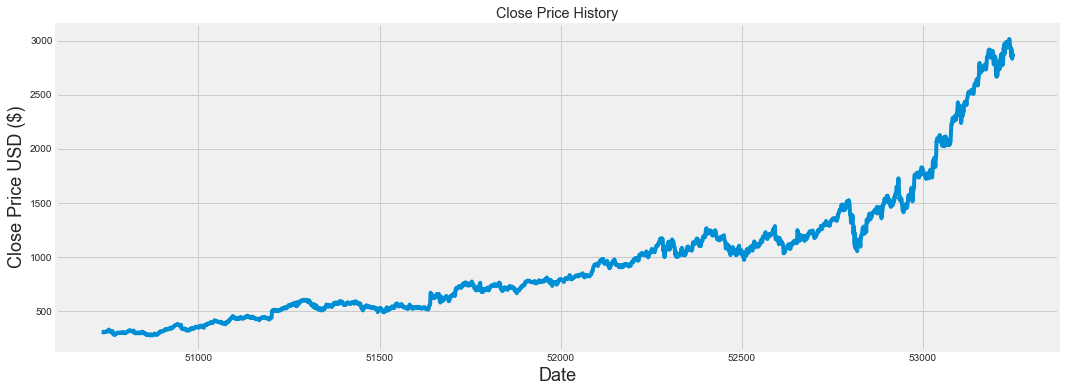

In [199]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [200]:
# Adding the news part
df_news = pd.read_excel(r'Dataset_Needed\sentiment_analysis.xlsx')
def clean(date):
    date = re.sub('[^0-9-]+', '', date)
    return datetime.strptime(date, '%Y-%m-%d')

In [201]:
df_news['flair polarity'] = df_news.apply(lambda row: (row['flair confidence']*-1
                                                        if row['flair sentiment'] == 'NEGATIVE'
                                                        else row['flair confidence']), axis=1)
df_news = df_news[['date', 'company', 'flair polarity']]
df_news['date'] = df_news['date'].apply(clean)
df_news = df_news[df_news['date'] > datetime(2010, 12, 31)].sort_values(by='date', ascending=False)

In [202]:
# GET NEWS SPECIFIC TO 
df_news = df_news[df_news['company'] == 'Google']
df_news

,date,company,flair polarity
118643,2020-07-24,Google,-0.966082
120033,2020-07-21,Google,-0.988863
120035,2020-07-21,Google,0.972716
119950,2020-07-21,Google,0.999780
120036,2020-07-21,Google,-0.986326
...,...,...,...
115656,2013-01-29,Google,-0.993888
115658,2013-01-29,Google,-0.922524
115671,2013-01-29,Google,-0.838684
115686,2013-01-29,Google,-0.990953


In [203]:
# Adding the news column specific to GOOGLE
def get_cumul(date):
    df_date = df_news[df_news['date'] < date]
    array = df_date['flair polarity'].values
    sum = np.sum(array)
    avg = sum / len(array)
    return avg
df['cumulative polarity'] = df['Date'].apply(get_cumul)
df = df.fillna(0)
df = df.set_index('Date').drop(columns=['company_name'])
df

,High,Low,Open,Close,Volume,Adj Close,cumulative polarity
Date,,,,,,,
2021-12-03,2904.260010,2823.000000,2889.909912,2850.409912,1333800,2850.409912,-0.341833
2021-12-02,2893.500000,2819.639893,2836.479980,2875.530029,1062500,2875.530029,-0.341833
2021-12-01,2929.982910,2830.000000,2884.250000,2832.360107,1423800,2832.360107,-0.341833
2021-11-30,2932.570068,2841.320068,2909.004883,2849.040039,2079500,2849.040039,-0.341833
2021-11-29,2937.239990,2885.969971,2885.969971,2922.280029,1313800,2922.280029,-0.341833
...,...,...,...,...,...,...,...
2011-12-09,313.390350,307.352966,307.846130,312.538544,5553137,312.538544,0.000000
2011-12-08,312.553467,306.501160,309.360443,306.874756,4844290,306.874756,0.000000
2011-12-07,311.661804,307.895935,309.679260,310.531067,4531522,310.531067,0.000000


In [204]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close', 'cumulative polarity'])
data = data.iloc[::-1]
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [205]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [206]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])  
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 2))

In [207]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 2)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(2))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2332/2332 [==============================] - 39s 16ms/step - loss: 0.0031


In [208]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[int(training_data_len):, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 2 ))

In [209]:
# Get the models predicted price values 
y_test = y_test[:,0]
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:,0]
# Get the MAPE 
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(mape, "%")

1.5714667293898315 %


<ipython-input-210-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


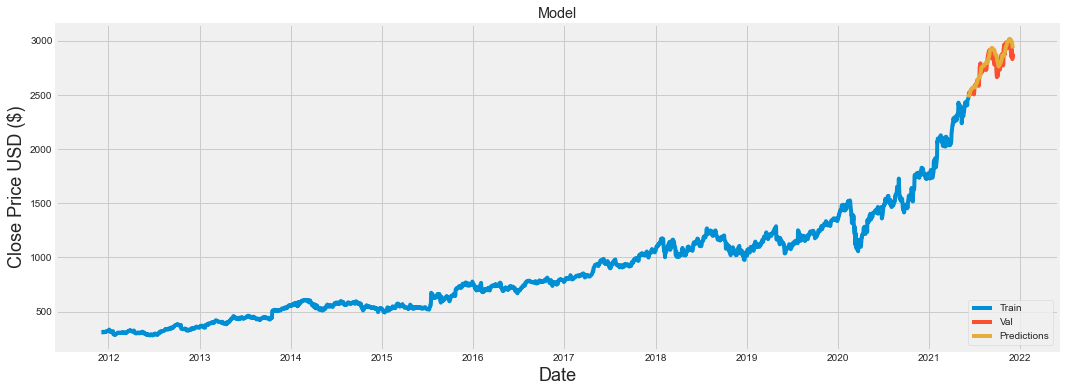

In [210]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [211]:
valid

,Close,cumulative polarity,Predictions
Date,,,
2021-06-09,2491.399902,-0.341833,2477.585449
2021-06-10,2521.600098,-0.341833,2488.786133
2021-06-11,2513.929932,-0.341833,2502.459229
2021-06-14,2527.040039,-0.341833,2515.451904
2021-06-15,2520.659912,-0.341833,2528.113525
...,...,...,...
2021-11-29,2922.280029,-0.341833,2990.088867
2021-11-30,2849.040039,-0.341833,2978.666748
2021-12-01,2832.360107,-0.341833,2963.063232
